<div style="text-align:center">
    <h1>Fundamentos em Visualização de Dados com Seaborn. 📊</h1>
</div>

<div style="text-align:center">
    <img src="Datas/seaborn.png" width="500rem" />
</div>

### ✨ Seaborn é uma biblioteca de visualização de dados em Python que é baseada no matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.

In [35]:
# !pip install seaborn

In [1]:
import seaborn as sns # DOC: https://seaborn.pydata.org/installing.html

In [2]:
df_iris = sns.load_dataset('iris')
df_tips = sns.load_dataset('tips')
df_titanic = sns.load_dataset('titanic')
df_planets = sns.load_dataset('planets')
df_diamonds = sns.load_dataset('diamonds')
df_flights = sns.load_dataset('flights')

In [38]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Tipo de Gráfico: Distribuição
> histplot() -> usada para criar um gráfico que exibe a distribuição de um conjunto de dados univariado.

<Axes: xlabel='total_bill', ylabel='Count'>

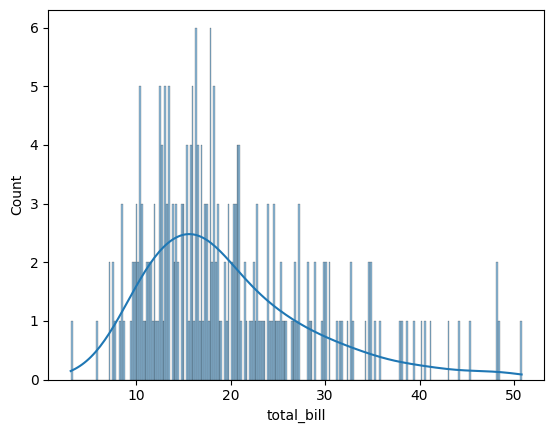

In [39]:
sns.histplot(df_tips['total_bill'], kde=True, bins=250)

### Tipo de Gráfico: Distribuição
>⚠️ O linhas abaixo mostram a relação entre duas variáveis, sendo a primeira 'x' é o 'total_bill' (conta_total e a 'y' a 'tip' (gorjeta). A ideia é buscar se quem tem a conta maior também paga as maiores gorjetas.

> jointplot() -> usada para criar uma visualização que combina dois tipos de gráficos para ajudar na análise de relacionamentos bivariados entre duas variáveis
 

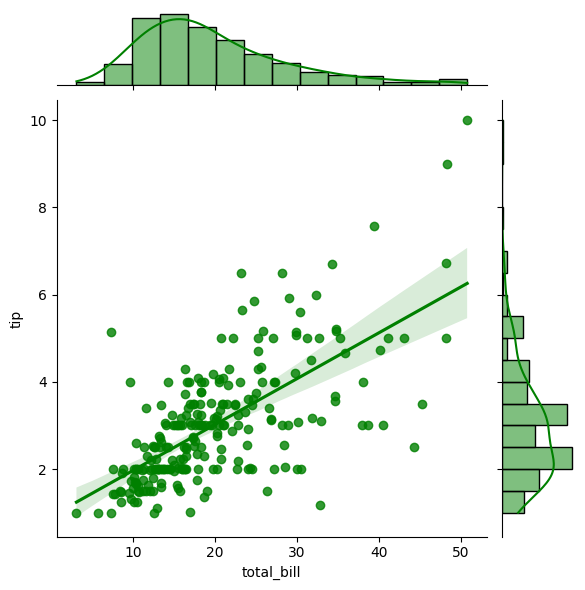

In [64]:
sns.jointplot(x='total_bill', y='tip', data=df_tips, kind='reg', color='green')

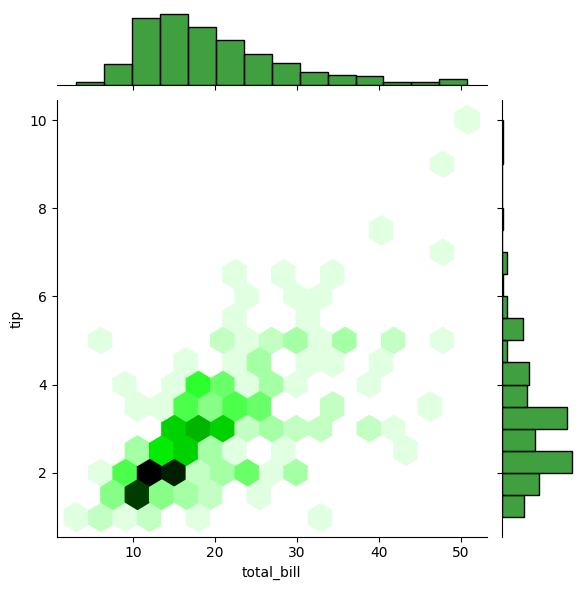

In [41]:
sns.jointplot(x='total_bill', y='tip', data=df_tips, kind='hex', color='green')

### Tipo de Gráfico: Distribuição
>⚠️ pairplot() -> usado para criar uma matriz de gráficos de dispersão que ajuda a visualizar as relações entre todas as combinações de variáveis em um conjunto de dados.

<div style="text-align:center">
    <img src="Datas/palette.png" width="400rem" />
</div>

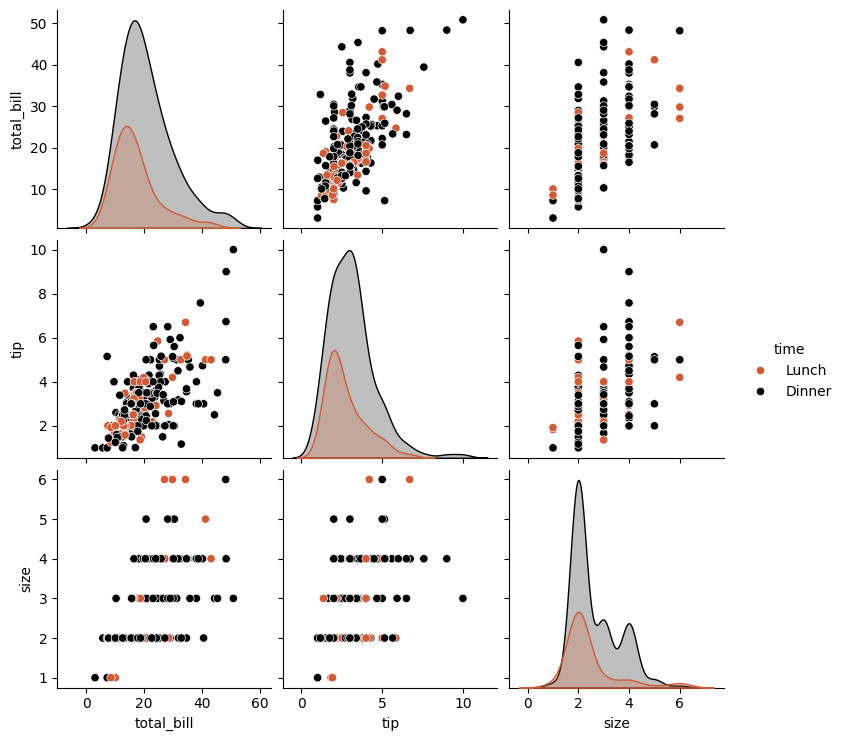

In [42]:
# param hue = distingue em coloração de acordo com a categorias
# param palette = A paleta de cores determina as cores usadas para representar as diferentes variáveis ou categorias nos gráficos de dispersão.

custom = [ '#CF5C36', '#000000'] # almoço, janta
sns.pairplot(df_tips, hue='time', palette=custom)

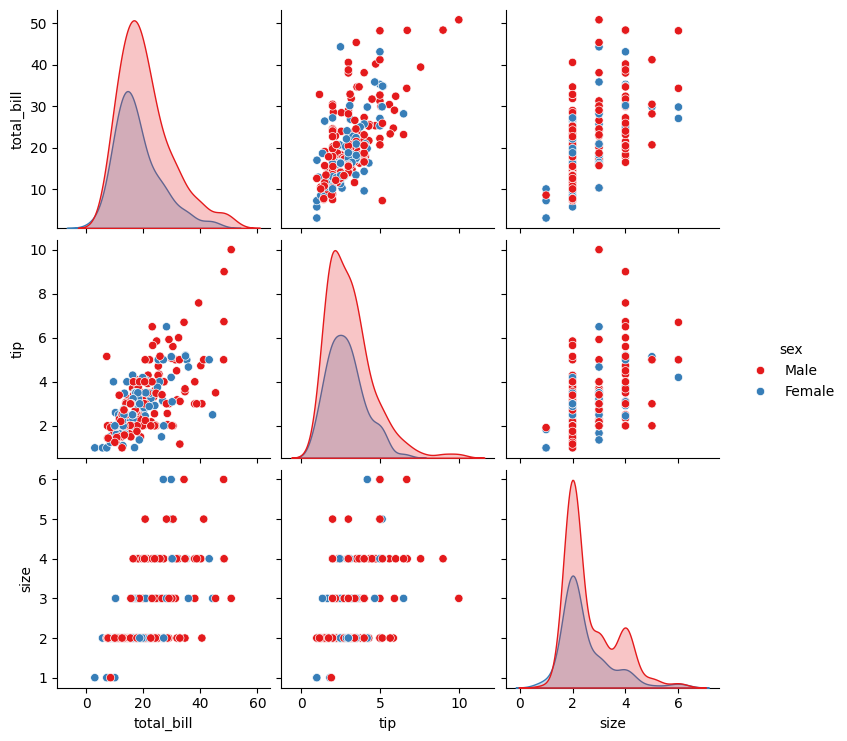

In [43]:
sns.pairplot(df_tips, hue='sex', palette='Set1')

### Tipo de Gráfico: Distribuição
>⚠️ kdeplot() -> usada para criar gráficos de estimativa de densidade de kernel (KDE), que são usados para visualizar a distribuição de uma variável contínua.

<Axes: xlabel='total_bill', ylabel='Density'>

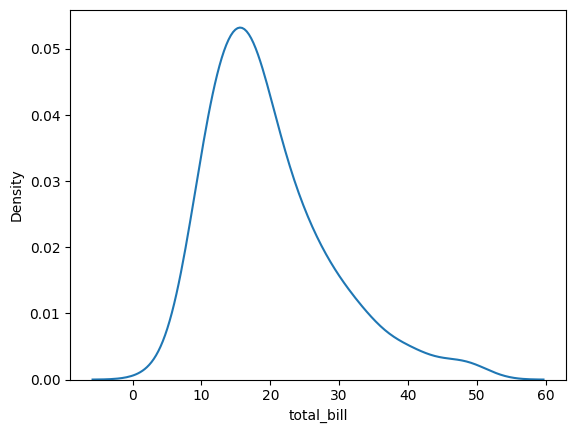

In [44]:
sns.kdeplot(df_tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

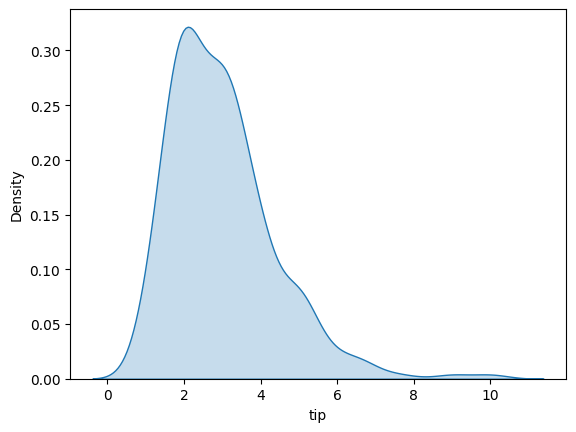

In [45]:
# param fill = preenche a área sob a curva KDE, tornando a visualização mais fácil de interpretar.
sns.kdeplot(df_tips['tip'], fill=True)

<Axes: xlabel='tip', ylabel='Density'>

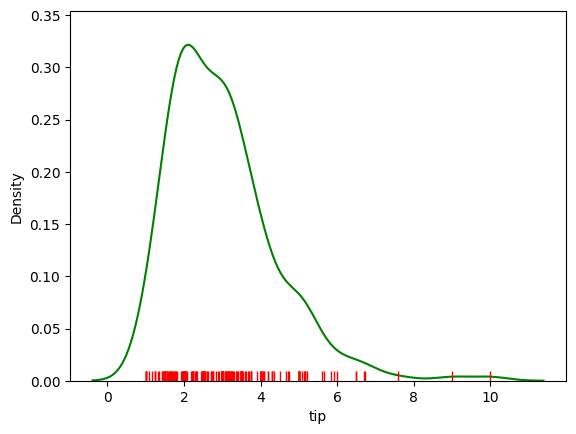

In [46]:
sns.kdeplot(df_tips['tip'], color='green')
sns.rugplot(df_tips['tip'], color='red')

### Tipo de Gráfico: Categórico
> ⚠️ barplot() no Seaborn é usada para criar gráficos de barras que representam estimativas centrais de uma variável categórica em relação a uma variável numérica.

<Axes: xlabel='sex', ylabel='total_bill'>

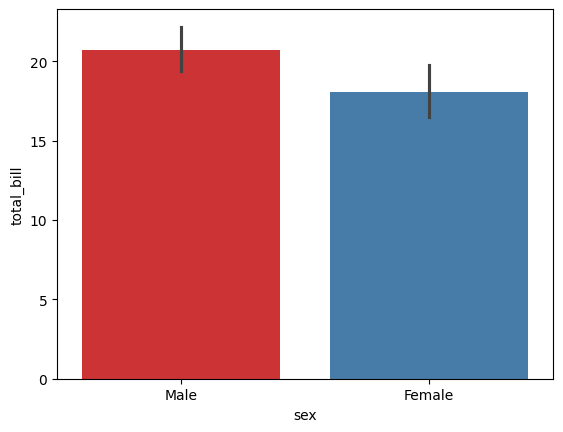

In [47]:
sns.barplot(x='sex', y='total_bill', data=df_tips, hue='sex', palette='Set1')

In [69]:
# O gráfico acima mostra a méida de ambos sexos com relação ao gasto total (total_bill)

df_tips.set_index('sex').loc['Female']['total_bill'].mean()

18.056896551724133

<Axes: xlabel='sex', ylabel='count'>

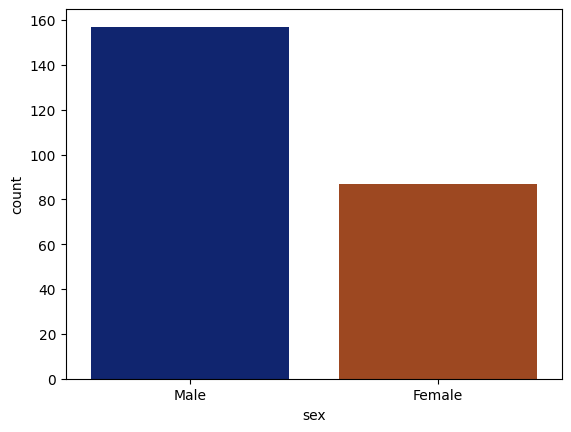

In [48]:
sns.countplot(x='sex', data=df_tips, hue='sex', palette='dark')


> ⚠️ boxplot() fornece uma representação visual das principais estatísticas resumidas, como a mediana, quartis, valores mínimos e máximos, além de identificar possíveis valores discrepantes (outliers). 

<Axes: xlabel='day', ylabel='total_bill'>

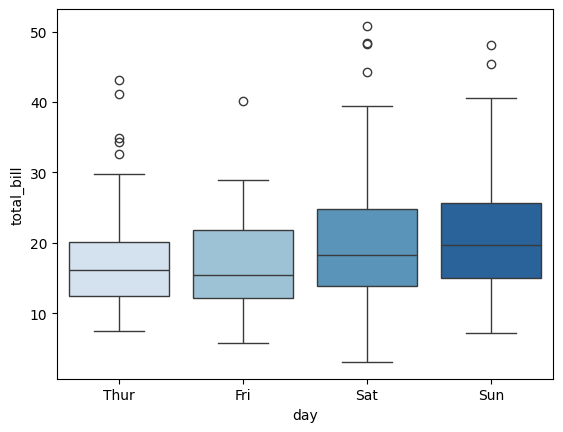

In [49]:
sns.boxplot(x='day', y='total_bill', data=df_tips, hue='day', palette='Blues')

Analisando acima o 'eixo x' onde o Sun (Domingo) tem uma média de 20, vamos buscar esse valor no pandas para confirmar se está correto:

In [55]:
import pandas as pd
df_tips.set_index('day').loc['Sun']['total_bill'].mean()

21.41

<Axes: xlabel='day', ylabel='total_bill'>

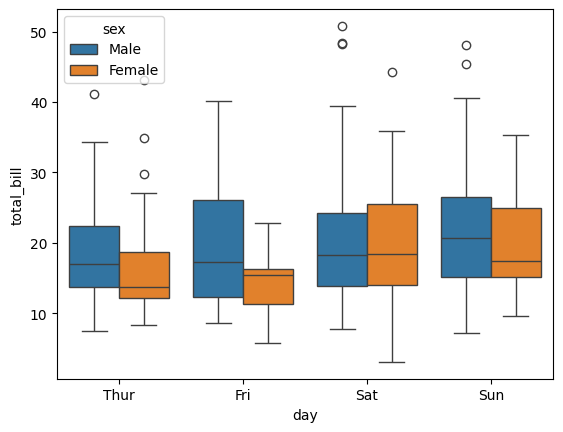

In [51]:
# param hue = sendo o 'sex' permite que você compare a distribuição das contas em relação ao sexo dos clientes.

sns.boxplot(x='day', y='total_bill', hue='sex', data=df_tips)

Analisando acima o 'eixo x' onde o Sun (Domingo) tem uma média de gasto igual a R$ 21 (Male/Masculino), vamos buscar esse valor no pandas para confirmar se está correto:

In [52]:
df_tips.set_index('day').loc['Sun'].query("`sex` == 'Male'")['total_bill'].mean()

21.887241379310346

<Axes: xlabel='day', ylabel='total_bill'>

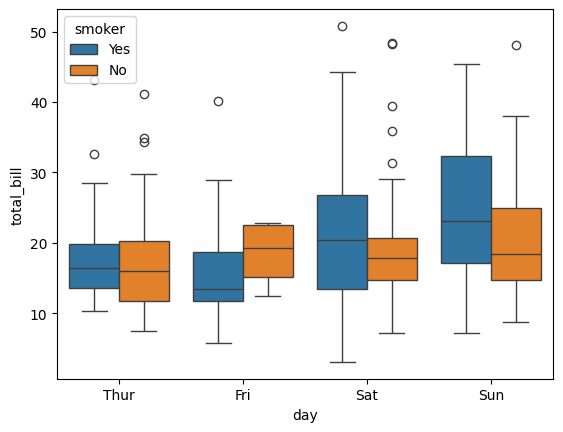

In [53]:
# param hue = sendo o 'smoker' permite que você compare a distribuição das contas em relação ao habito de fumar dos clientes.

sns.boxplot(x='day', y='total_bill', hue='smoker', data=df_tips)

Analisando acima o 'eixo x' onde o Fri (Sexta) tem uma máxima de gasto igual a R$ 40 (Fumante/Yes), vamos buscar esse valor no pandas para confirmar se está correto:

In [54]:
df_tips.set_index('day').loc['Fri'].query("`smoker` == 'Yes'")['total_bill'].max()

40.17

### Tipo de Gráfico: Regressão
> ⚠️ lmplot() função que oferece uma maneira conveniente de criar gráficos que mostram como uma variável dependente (a variável que você está tentando prever) se relaciona com uma variável independente (a variável que você acha que influencia a variável dependente).

<div style="text-align:center">
    <img src="Datas/markers.png" width="400rem" />
</div>

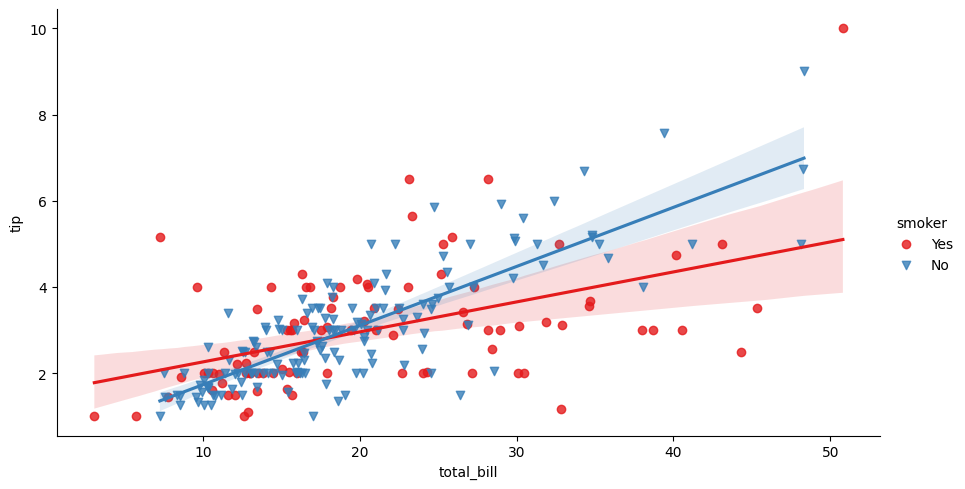

In [72]:
# param hue = permite a segregação dos dados.
# param markers = permite que você especifique como os pontos de dados no gráfico de dispersão são marcados e estilizados
# param aspect = permite controlar a proporção entre a largura e a altura dos gráficos criados

sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df_tips, palette='Set1', markers=['o','v'], aspect=1.8)

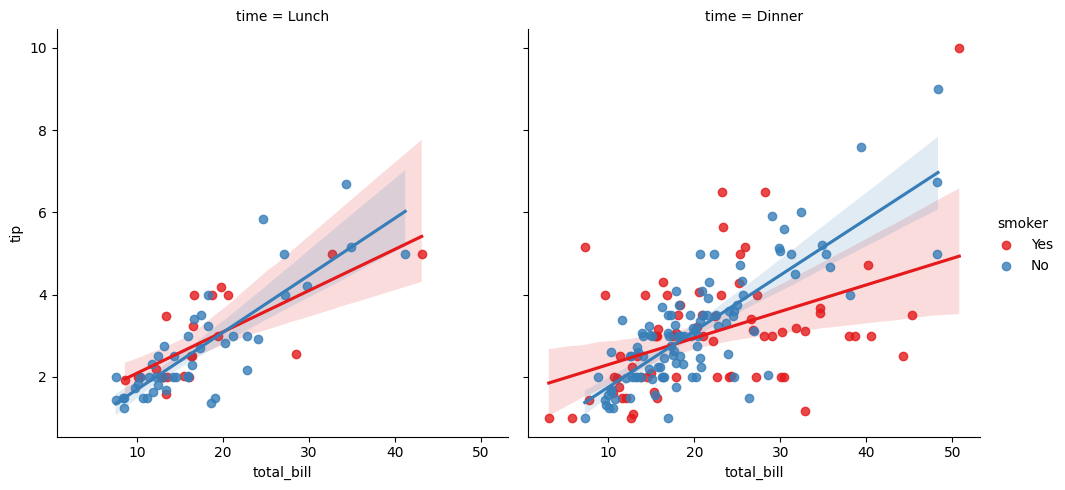

In [73]:
# param col= útil quando você deseja visualizar a relação entre duas variáveis dependentes em função de uma terceira variável categórica.

sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=df_tips, palette='Set1')

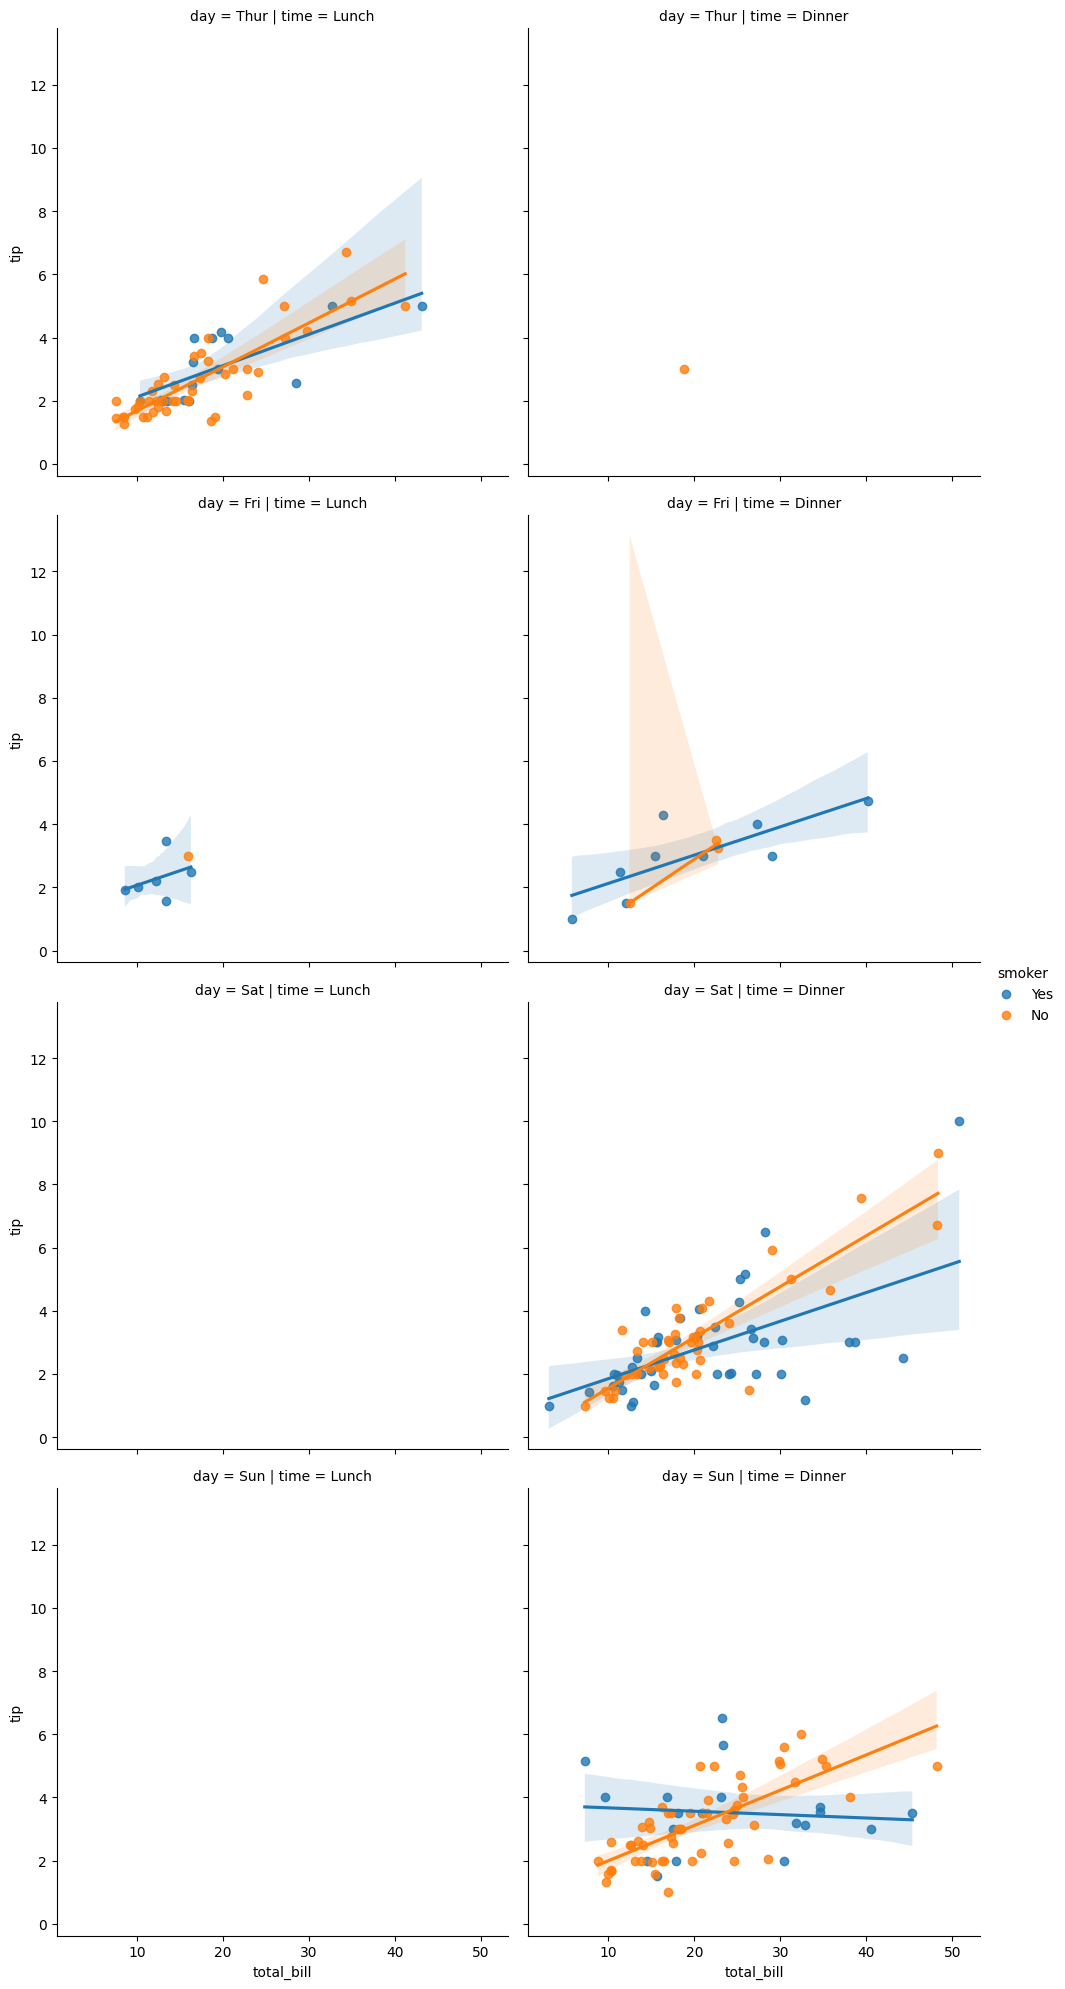

In [74]:
# param row = permite criar múltiplas linhas de gráficos de dispersão condicionados.

sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='day', data=df_tips, aspect=1)

### Tipo de Gráfico: Matriciais
> ⚠️ heatmap() é usada para criar um gráfico de calor, que é uma representação visual de uma matriz de dados, onde as células da matriz são coloridas de acordo com seus valores.

In [75]:
df_flights_matrix = df_flights.pivot_table(index='year', columns='month', values='passengers')

<Axes: xlabel='month', ylabel='year'>

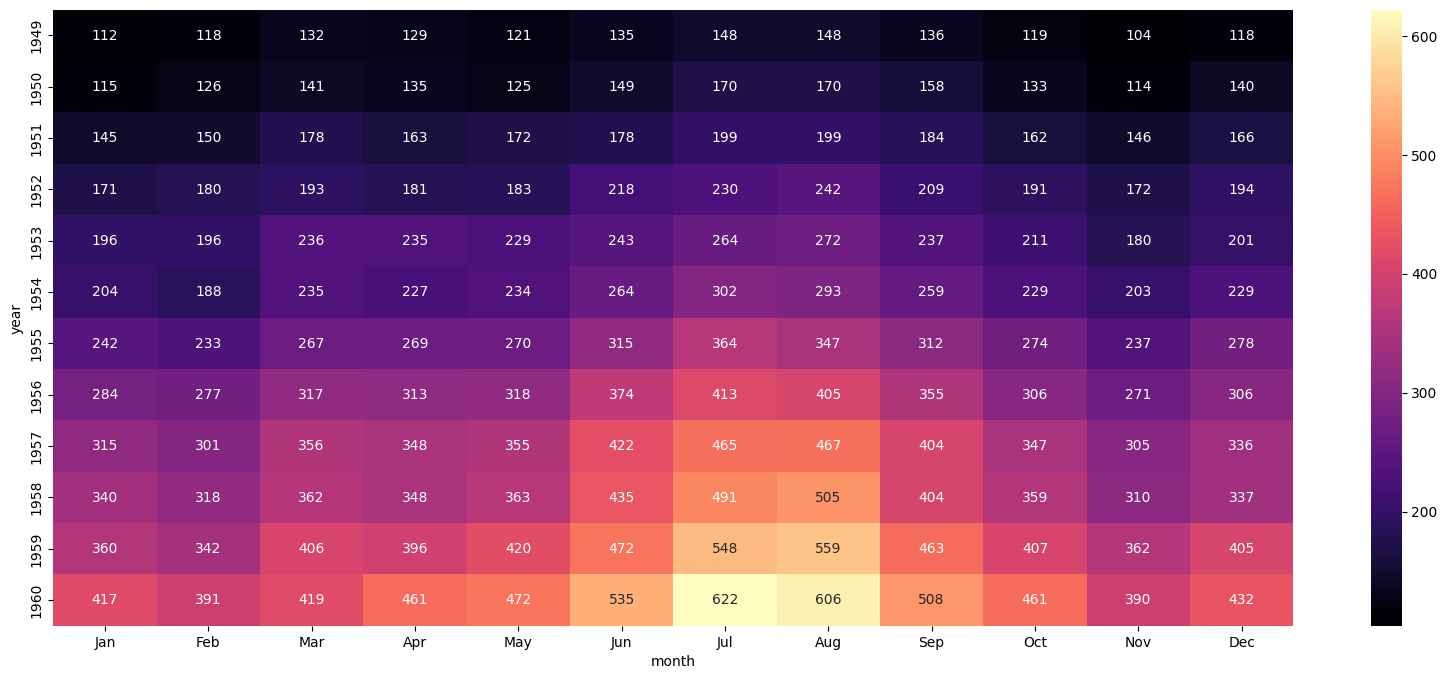

In [76]:
# param annot = permite que os valores da matriz devem ser anotados (exibidos) nos quadrados do mapa de calor.
# param fmt =  permite especificar o formato dos valores que serão exibidos nas células quando annot é definido como True
# param cmap = paleta de cores -> "viridis","plasma","coolwarm","YlGnBu","RdYlBu","Blues","Reds","Greens","cubehelix".

import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(20,8))
sns.heatmap(df_flights_matrix, ax=axes, annot=True, fmt='.0f', cmap='magma')